NOAA Weather Data:
        date   HDD
0 2022-01-01  30.0
1 2022-01-02  23.6
2 2022-01-03  31.5
3 2022-01-04  40.2
4 2022-01-05  22.7
                      date         HDD
count                  730  730.000000
mean   2022-12-31 12:00:00   24.876712
min    2022-01-01 00:00:00    0.000000
25%    2022-07-02 06:00:00   18.025000
50%    2022-12-31 12:00:00   24.900000
75%    2023-07-01 18:00:00   31.300000
max    2023-12-31 00:00:00   63.500000
std                    NaN    9.793089

EIA Energy Demand Data:
        date  demand
0 2022-01-01   201.8
1 2022-01-02   158.3
2 2022-01-03   211.5
3 2022-01-04   234.1
4 2022-01-05   173.6
                      date      demand
count                  730  730.000000
mean   2022-12-31 12:00:00  175.423562
min    2022-01-01 00:00:00   43.300000
25%    2022-07-02 06:00:00  139.200000
50%    2022-12-31 12:00:00  174.750000
75%    2023-07-01 18:00:00  210.100000
max    2023-12-31 00:00:00  362.000000
std                    NaN   50.683982
Weather date r

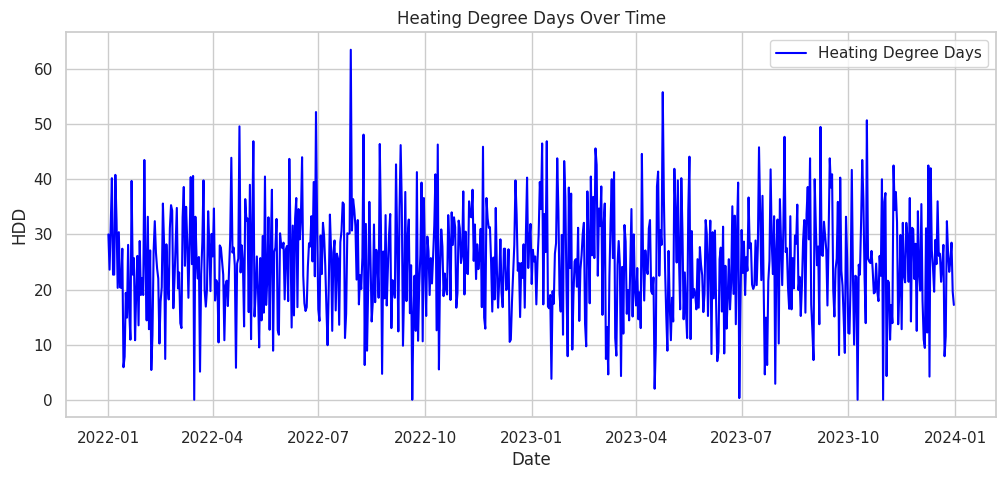

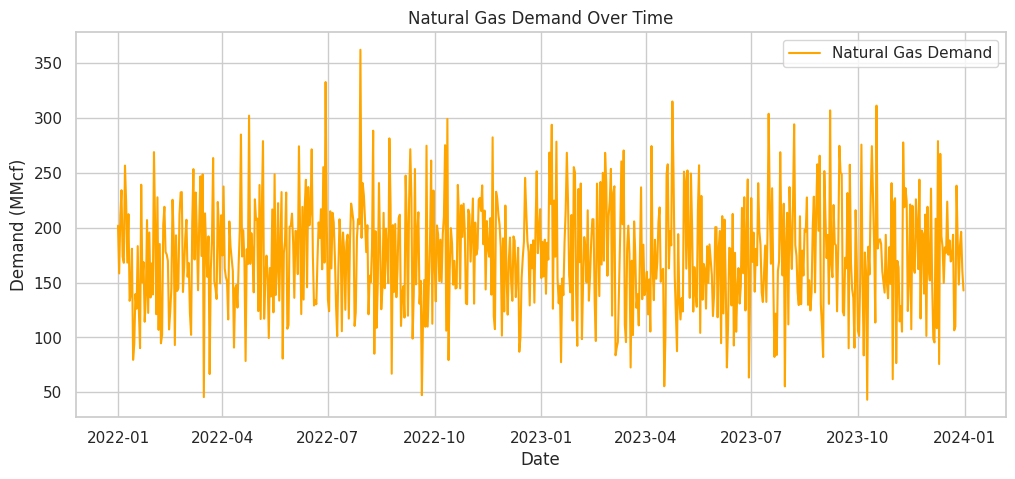


Merged Data Sample:
        date   HDD  demand
0 2022-01-01  30.0   201.8
1 2022-01-02  23.6   158.3
2 2022-01-03  31.5   211.5
3 2022-01-04  40.2   234.1
4 2022-01-05  22.7   173.6


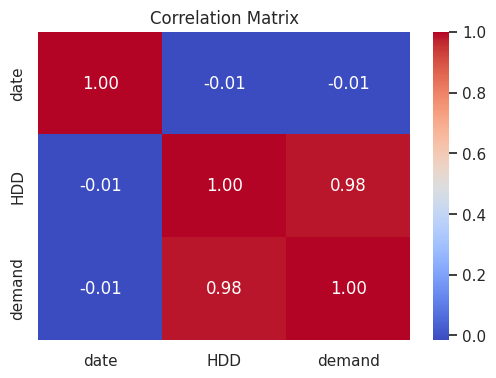

In [2]:
# 📦 Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set up visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

# 📥 Load data
# If uploading manually in Colab:
#from google.colab import files
#uploaded = files.upload()

# Then load the CSVs
df_weather = pd.read_csv("noaa_hdd.csv", parse_dates=["date"])
df_energy = pd.read_csv("eia_natgas.csv", parse_dates=["date"])

# 🧼 Quick inspection
print("NOAA Weather Data:")
print(df_weather.head())
print(df_weather.describe())

print("\nEIA Energy Demand Data:")
print(df_energy.head())
print(df_energy.describe())

# 🗓️ Check date alignment
print(f"Weather date range: {df_weather['date'].min()} to {df_weather['date'].max()}")
print(f"Energy date range: {df_energy['date'].min()} to {df_energy['date'].max()}")

# 📈 Plot time series
plt.plot(df_weather["date"], df_weather["HDD"], label="Heating Degree Days", color="blue")
plt.title("Heating Degree Days Over Time")
plt.xlabel("Date")
plt.ylabel("HDD")
plt.legend()
plt.show()

plt.plot(df_energy["date"], df_energy["demand"], label="Natural Gas Demand", color="orange")
plt.title("Natural Gas Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand (MMcf)")
plt.legend()
plt.show()

# 🔗 Merge datasets
df_merged = pd.merge(df_weather, df_energy, on="date", how="inner")

# 🧠 Correlation check
print("\nMerged Data Sample:")
print(df_merged.head())

plt.figure(figsize=(6, 4))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

